# Name : Kartabya Krishna
# Reg No : 210968244
# Batch : B2
# Date : 20230824

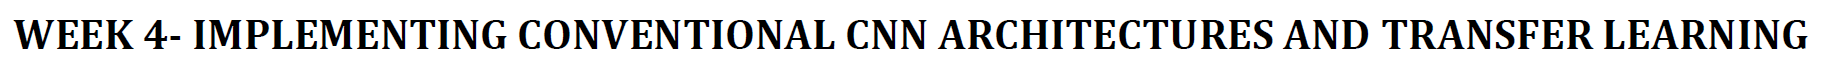

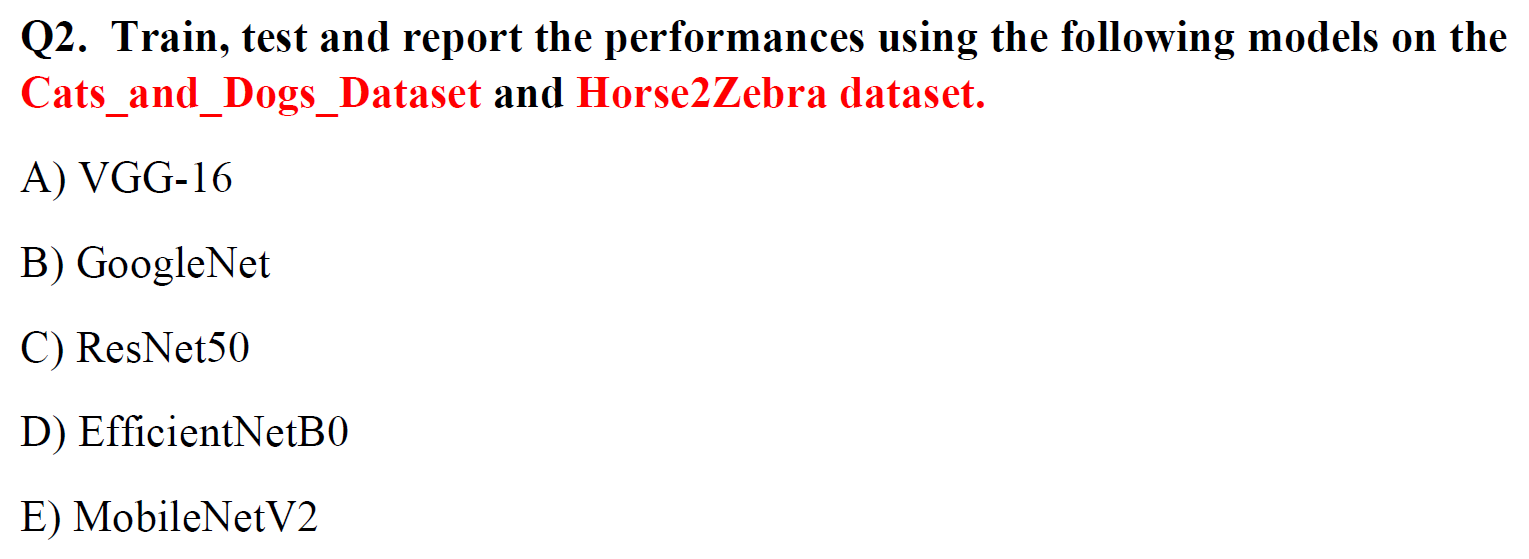

In [ ]:
import tensorflow as tf  # Import TensorFlow as 'tf'
keras = tf.keras          # Import Keras from TensorFlow as 'keras'
from keras import Sequential, Input  # Import Sequential and Input from Keras
from keras.layers import Conv2D, Dense, AveragePooling2D, Flatten, MaxPooling2D  # Import specific layers
from keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator
import pandas as pd  # Import pandas for data manipulation
import numpy as np   # Import NumPy for numerical operations
import seaborn as sns  # Import Seaborn for data visualization
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from keras.preprocessing.image import array_to_img, img_to_array, load_img  # Additional image processing
from keras.optimizers import Adam  # Import the Adam optimizer
from keras.utils import plot_model  # Import the plot_model function
import os  # Import os for file system interaction
from keras.applications import VGG16, ResNet50, MobileNetV2, EfficientNetB0, InceptionV3  # Pre-trained models


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
base_dir = './horse2zebra'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_horse_dir = os.path.join(train_dir, 'trainA')
train_zebra_dir = os.path.join(train_dir, 'trainB')
validation_horse_dir = os.path.join(validation_dir, 'valA')
validation_zebra_dir = os.path.join(validation_dir, 'valB')
test_horse_dir = os.path.join(test_dir, 'testA')
test_zebra_dir = os.path.join(test_dir, 'testB')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
)

Found 2101 images belonging to 2 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
)

Found 300 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
)

Found 260 images belonging to 2 classes.


## VGG-16

In [ ]:
vgg_model = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
vgg_model.trainable = False
vgg_model.summary()

2023-08-28 22:12:03.085434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-28 22:12:04.310179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-28 22:12:04.310272: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-28 22:12:04.347113: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-28 22:12:04.347209: I tensorflow/compile

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
custom_vgg_model = Sequential([
    vgg_model,
    Flatten(),
    Dense(2, activation='softmax')
])

custom_vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14764866 (56.32 MB)
Trainable params: 50178 (196.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
custom_vgg_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001), metrics=['acc'])

In [ ]:
vgg_history = custom_vgg_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20


2023-08-28 22:12:19.685871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-28 22:12:21.126530: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-28 22:12:26.747343: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x45ed870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-28 22:12:26.747459: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-08-28 22:12:27.445417: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-28 22:12:28.566449: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-28 22:12:28.766342: I ./tensorflow/compiler/jit/device_compi

106/106 [==============================] - 50s 375ms/step - loss: 0.3111 - acc: 0.8701 - val_loss: 0.2105 - val_acc: 0.9367
Epoch 2/20
106/106 [==============================] - 29s 273ms/step - loss: 0.1496 - acc: 0.9562 - val_loss: 0.1700 - val_acc: 0.9467
Epoch 3/20
106/106 [==============================] - 28s 258ms/step - loss: 0.1161 - acc: 0.9653 - val_loss: 0.1535 - val_acc: 0.9467
Epoch 4/20
106/106 [==============================] - 29s 271ms/step - loss: 0.0921 - acc: 0.9781 - val_loss: 0.1416 - val_acc: 0.9533
Epoch 5/20
106/106 [==============================] - 27s 255ms/step - loss: 0.0798 - acc: 0.9800 - val_loss: 0.1347 - val_acc: 0.9567
Epoch 6/20
106/106 [==============================] - 27s 254ms/step - loss: 0.0671 - acc: 0.9862 - val_loss: 0.1368 - val_acc: 0.9600
Epoch 7/20
106/106 [==============================] - 27s 253ms/step - loss: 0.0611 - acc: 0.9876 - val_loss: 0.1289 - val_acc: 0.9600
Epoch 8/20
106/106 [==============================] - 27s 251ms/st

In [ ]:
custom_vgg_model.evaluate(test_generator)

13/13 [==============================] - 4s 337ms/step - loss: 0.0904 - acc: 0.9692


[0.09044620394706726, 0.9692307710647583]

## GoogleNet

In [ ]:
google_model = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
google_model.trainable = False
google_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
custom_google_model = Sequential([
    google_model,
    Flatten(),
    Dense(2, activation='softmax')
])

custom_google_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21905186 (83.56 MB)
Trainable params: 102402 (400.01 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
custom_google_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001), metrics=['acc'])

In [ ]:
google_history = custom_google_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
106/106 [==============================] - 36s 275ms/step - loss: 0.1018 - acc: 0.9624 - val_loss: 0.0704 - val_acc: 0.9833
Epoch 2/20
106/106 [==============================] - 26s 247ms/step - loss: 0.0080 - acc: 0.9971 - val_loss: 0.0739 - val_acc: 0.9800
Epoch 3/20
106/106 [==============================] - 27s 253ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0714 - val_acc: 0.9800
Epoch 4/20
106/106 [==============================] - 27s 253ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0723 - val_acc: 0.9800
Epoch 5/20
106/106 [==============================] - 28s 259ms/step - loss: 8.2422e-04 - acc: 1.0000 - val_loss: 0.0716 - val_acc: 0.9800
Epoch 6/20
106/106 [==============================] - 27s 259ms/step - loss: 6.2024e-04 - acc: 1.0000 - val_loss: 0.0745 - val_acc: 0.9800
Epoch 7/20
106/106 [==============================] - 28s 264ms/step - loss: 5.1908e-04 - acc: 1.0000 - val_loss: 0.0738 - val_acc: 0.9800
Epoch 8/20
106/106 [=======================

In [ ]:
custom_google_model.evaluate(test_generator)

13/13 [==============================] - 3s 224ms/step - loss: 0.0956 - acc: 0.9846


[0.09562801569700241, 0.9846153855323792]

## ResNet50

In [ ]:
res_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
res_model.trainable = False
res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
custom_res_model = Sequential([
    res_model,
    Flatten(),
    Dense(2, activation='softmax')
])

custom_res_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23788418 (90.75 MB)
Trainable params: 200706 (784.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
custom_res_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001), metrics=['acc'])

In [ ]:
res_history = custom_res_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
106/106 [==============================] - 33s 271ms/step - loss: 0.5679 - acc: 0.7120 - val_loss: 0.5447 - val_acc: 0.6800
Epoch 2/20
106/106 [==============================] - 27s 253ms/step - loss: 0.4128 - acc: 0.8110 - val_loss: 0.4303 - val_acc: 0.8100
Epoch 3/20
106/106 [==============================] - 27s 257ms/step - loss: 0.3733 - acc: 0.8358 - val_loss: 0.4026 - val_acc: 0.8100
Epoch 4/20
106/106 [==============================] - 27s 249ms/step - loss: 0.3410 - acc: 0.8515 - val_loss: 0.4080 - val_acc: 0.8267
Epoch 5/20
106/106 [==============================] - 27s 254ms/step - loss: 0.3483 - acc: 0.8434 - val_loss: 0.3813 - val_acc: 0.8300
Epoch 6/20
106/106 [==============================] - 31s 289ms/step - loss: 0.3091 - acc: 0.8639 - val_loss: 0.4447 - val_acc: 0.7967
Epoch 7/20
106/106 [==============================] - 39s 365ms/step - loss: 0.3055 - acc: 0.8663 - val_loss: 0.3726 - val_acc: 0.8367
Epoch 8/20
106/106 [==============================] - 2

In [ ]:
custom_res_model.evaluate(test_generator)

13/13 [==============================] - 3s 225ms/step - loss: 0.2821 - acc: 0.8885


[0.28209516406059265, 0.8884615302085876]

## EfficientNetB0

In [ ]:
eff_model = EfficientNetB0(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
eff_model.trainable = False
eff_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [ ]:
custom_eff_model = Sequential([
    eff_model,
    Flatten(),
    Dense(2, activation='softmax')
])

custom_eff_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4175013 (15.93 MB)
Trainable params: 125442 (490.01 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [ ]:
custom_eff_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001), metrics=['acc'])

In [ ]:
eff_history = custom_eff_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20


2023-08-28 22:40:57.090069: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


106/106 [==============================] - 41s 329ms/step - loss: 0.7882 - acc: 0.5355 - val_loss: 0.7453 - val_acc: 0.5067
Epoch 2/20
106/106 [==============================] - 34s 322ms/step - loss: 0.6986 - acc: 0.5678 - val_loss: 0.6557 - val_acc: 0.5000
Epoch 3/20
106/106 [==============================] - 35s 333ms/step - loss: 0.6723 - acc: 0.6007 - val_loss: 0.6939 - val_acc: 0.5367
Epoch 4/20
106/106 [==============================] - 34s 323ms/step - loss: 0.7823 - acc: 0.5602 - val_loss: 0.6553 - val_acc: 0.5933
Epoch 5/20
106/106 [==============================] - 34s 315ms/step - loss: 0.6503 - acc: 0.6102 - val_loss: 0.5992 - val_acc: 0.7567
Epoch 6/20
106/106 [==============================] - 31s 286ms/step - loss: 0.6470 - acc: 0.6159 - val_loss: 0.5957 - val_acc: 0.7567
Epoch 7/20
106/106 [==============================] - 33s 312ms/step - loss: 0.6458 - acc: 0.6383 - val_loss: 0.5983 - val_acc: 0.6767
Epoch 8/20
106/106 [==============================] - 33s 310ms/st

In [ ]:
custom_eff_model.evaluate(test_generator)

13/13 [==============================] - 4s 266ms/step - loss: 1.1298 - acc: 0.5077


[1.1297975778579712, 0.5076923370361328]

## MobileNetV2


In [ ]:
mobile_model = MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
mobile_model.trainable = False
mobile_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_5[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
custom_mobile_model = Sequential([
    mobile_model,
    Flatten(),
    Dense(2, activation='softmax')
])

custom_mobile_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2383426 (9.09 MB)
Trainable params: 125442 (490.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
custom_mobile_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001), metrics=['acc'])

In [ ]:
mobile_history = custom_mobile_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
106/106 [==============================] - 34s 290ms/step - loss: 0.0940 - acc: 0.9657 - val_loss: 0.0699 - val_acc: 0.9867
Epoch 2/20
106/106 [==============================] - 31s 292ms/step - loss: 0.0041 - acc: 0.9986 - val_loss: 0.0534 - val_acc: 0.9867
Epoch 3/20
106/106 [==============================] - 29s 269ms/step - loss: 6.4857e-04 - acc: 1.0000 - val_loss: 0.0587 - val_acc: 0.9867
Epoch 4/20
106/106 [==============================] - 28s 261ms/step - loss: 3.8288e-04 - acc: 1.0000 - val_loss: 0.0578 - val_acc: 0.9867
Epoch 5/20
106/106 [==============================] - 28s 259ms/step - loss: 3.0013e-04 - acc: 1.0000 - val_loss: 0.0591 - val_acc: 0.9867
Epoch 6/20
106/106 [==============================] - 27s 256ms/step - loss: 2.4125e-04 - acc: 1.0000 - val_loss: 0.0586 - val_acc: 0.9867
Epoch 7/20
106/106 [==============================] - 27s 254ms/step - loss: 2.0050e-04 - acc: 1.0000 - val_loss: 0.0597 - val_acc: 0.9867
Epoch 8/20
106/106 [===============

In [ ]:
custom_mobile_model.evaluate(test_generator)

13/13 [==============================] - 3s 225ms/step - loss: 0.0983 - acc: 0.9846


[0.09826488047838211, 0.9846153855323792]